* student id : 20152424  
* name : kim rocky  
* githublink : https://github.com/Epicevent/assignment05  

# import pakages and show Input image : cau.jpg

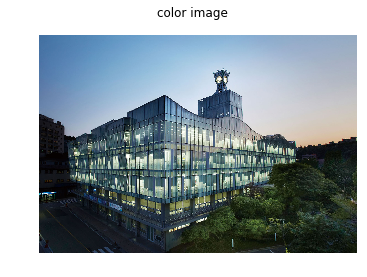

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
import math
file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)
# plot input image
p1=plt.figure(1)
p1.suptitle('color image')
plt.imshow(im_color)
plt.axis('off')
plt.show()

# input gray image : cau.jpg(gray)

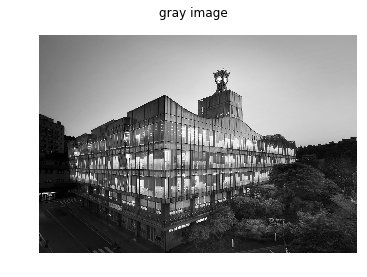

In [70]:
# plot input - gray image
im_gray  	= color.rgb2gray(im_color)
p1=plt.figure(2)
p1.suptitle('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.show()

# Definition of the convolution kernels 

## kernel  for computing the derivative

### name : k1_der3x3 
* x-dir  

$$
 \begin{matrix}
  -1 & 0 & 1 \\
  -2 & 0 & 2 \\
  -1 & 0 & 1
 \end{matrix}
 $$
 * y-dir
 $$
  \begin{matrix}
  -1 & -2 & -1 \\
  0 & 0 & 0 \\
  1 & 2 & 1
 \end{matrix}
 $$
### name : k2_der3x3
* x-dir  

$$
 \begin{matrix}
  -3 & 0 & 3 \\
  -10 & 0 & 10 \\
  -3 & 0 & 3
 \end{matrix}
 $$
 * y-dir
 $$
  \begin{matrix}
  -3 & -10 & -3 \\
  0 & 0 & 0 \\
  3 & 10 & 3
 \end{matrix}
 $$

In [3]:
# der means derivative
ker_1_der_3x3_xdir = np.array([[-1,0,1],[-2,1,2],[-1,0,1]])
ker_1_der_3x3_ydir = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
ker_2_der_3x3_xdir = np.array([[-3,0,3],[-10,0,10],[-3,0,3]])
ker_2_der_3x3_ydir = np.array([[-3,-10,-3],[0,0,0],[3,10,3]])

# Function for computing the magnitude of the gradient

The operator uses two kernels $ K_{x}\,K_{y} $ which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes, and one for vertical. If we define A as the source image, and Gx and Gy are two images which at each point contain the vertical and horizontal derivative approximations respectively, the computations are as follows:

$$ G_{x} = K_{x} * A $$
$$ G_{y} = K_{y} * A $$
The x-coordinate is defined here as increasing in the "right"-direction, and the y-coordinate is defined as increasing in the "down"-direction. At each point in the image, the resulting gradient approximations can be combined to give the gradient magnitude, using:
$$ \sqrt{ G_{x}^{2}+G_{y}^{2}} $$

In [4]:
def compute_gradient(kerx , kery, image):# gradient of 2D image
    G_x = signal.convolve2d(image, kerx, boundary='symm', mode='same') 
    G_y = signal.convolve2d(image, kery, boundary='symm', mode='same') 
    return G_x,G_y
def compute_magnitude(gradientx,gradienty):# gradient magnitude of 2d image
    M = np.sqrt( gradientx**2 + gradienty**2)
    return M
    

# Function for computing direction of gradient
the direction of gradient is defined as :
$$ \mathbf{\Theta} = \operatorname{atan}\left({ \mathbf{G}_y \over \mathbf{G}_x }\right) $$

### but we use arctan2 for exeption handling

In [16]:
def compute_direction(gradientx,gradienty):
    shape_of_g = np.shape(gradientx)
    n = shape_of_g[0] # rows
    m = shape_of_g[1] # cols
    angle_matrix = np.empty(shape_of_g)
    for i in range(n):
        for j in range(m):
            angle_matrix[i,j] = np.arctan2(gradientx[i,j],gradienty[i,j])
    return angle_matrix

# function for visualizing magnitude of the gradient

In [26]:
def visualize_gradient_magnitude(gradient_magnitude_data):
    data = gradient_magnitude_data
    data_normalized = (data - np.amin(data)) / (np.amax(data) - np.amin(data))#nomalize to 0~1
    f1 = plt.figure(1)
    plt.imshow(data_normalized, cmap='gray')

# visualize magnitude of the gradient : using kernel : ker_1_der_3x3

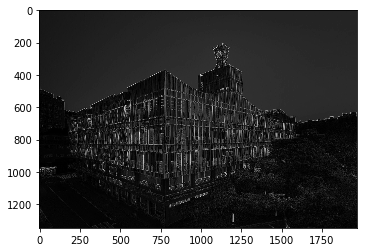

In [27]:
g_1_x ,g_1_y = compute_gradient(ker_1_der_3x3_xdir,ker_1_der_3x3_ydir,im_gray)
magnitude_data_1 = compute_magnitude(g_1_x,g_1_y)
visualize_gradient_magnitude(magnitude_data_1)# first example of Gradient kernel

easy to figure out ! Chung Ang univ library

# visualize magnitude of the gradient : using kernel : ker_2_der_3x3

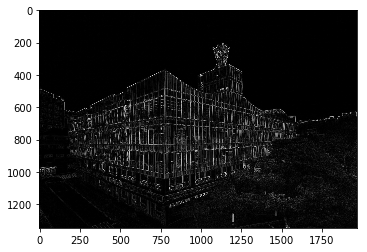

In [28]:
g_2_x ,g_2_y = compute_gradient(ker_2_der_3x3_xdir,ker_2_der_3x3_ydir,im_gray)
magnitude_data_2 = compute_magnitude(g_2_x,g_2_y)
visualize_gradient_magnitude(magnitude_data_2)# second example of Gradient kernel

edge !!

# function for visualizing direction of the gradient

In [67]:
from matplotlib.patches import Arrow
def visualizeing_direction_of_image(image, angle_matrix):
    fig, axe = plt.subplots(1)
    print(angle_matrix) # show direction in printing
    axe.imshow(image, cmap='gray')
    # patch angle on image
    window_size = (80,100) # in one window we draw one arrow
    rows = int(np.floor(np.shape(image)[0]/window_size[0]))
    cols = int(np.floor(np.shape(image)[1]/window_size[1]))
    for i in range(rows):
        for j in range(cols):
            cossum = 0
            sinsum = 0
            for k in range(window_size[0]):
                for l in range(window_size[1]):
                    cossum += np.cos(angle_matrix[i*window_size[0]+k][j*window_size[1]+l])
                    sinsum += np.sin(angle_matrix[i*window_size[0]+k][j*window_size[1]+l])
            theta = np.arctan2(cossum,sinsum)# recaculate gradient direction respect of image_window
            axe.add_patch(
            Arrow(j*window_size[1]+window_size[1]/2,i*window_size[0]+window_size[0]/2,
                  50*np.cos(theta),50*np.sin(theta), width=10., color='red')# 50: arrow length
            )
    plt.show(fig)#show direction (red arrows) in image

# visualize directions : using kernel : ker_1_der_3x3

[[1.57079633 1.57079633 1.57079633 ... 1.57079633 1.57079633 1.57079633]
 [1.60896106 1.60896106 1.60896106 ... 1.57079633 1.57079633 1.57079633]
 [1.60860054 1.60860054 1.60860054 ... 1.57079633 1.57079633 1.57079633]
 ...
 [1.46252252 1.45713027 1.38169065 ... 0.48832547 0.79262871 1.03515823]
 [1.01803922 1.17966089 1.28760404 ... 2.53697013 2.41924316 2.23602933]
 [1.57079633 1.57079633 1.57079633 ... 1.57079633 1.57079633 1.57079633]]


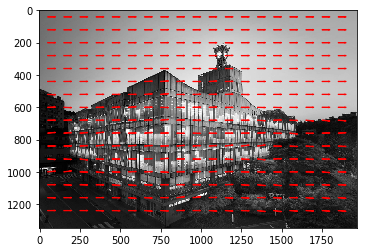

In [68]:
a_1 = compute_direction(g_1_x,g_1_y)# first example of Angle matrix
visualizeing_direction_of_image(im_gray, a_1)

the directions are all too simillar to alnaysis image

## visualize directions : using kernel : ker_2_der_3x3

[[ 0.          0.          0.         ...  3.14159265  3.14159265
   3.14159265]
 [ 3.14159265  3.14159265  3.14159265 ...  3.14159265  3.14159265
   3.14159265]
 [ 3.14159265  3.14159265  3.14159265 ...  3.14159265  3.14159265
   3.14159265]
 ...
 [ 1.01914134  1.28641155  1.152572   ... -0.35994853 -0.4133304
  -0.12435499]
 [ 0.24192057  0.70085441  0.90250691 ... -2.02879428 -2.40787257
  -2.97433872]
 [ 1.57079633  1.57079633  1.57079633 ... -1.57079633 -1.57079633
  -1.57079633]]


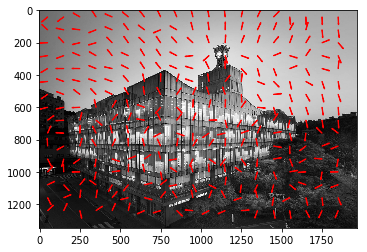

In [69]:
a_2 = compute_direction(g_2_x,g_2_y)# second example of Angle matrix
visualizeing_direction_of_image(im_gray, a_2)

great result . 

# Define kernels for smoothing image

* kernel 1_s
$$
\frac{1}{256}
\begin{bmatrix}
1 & 4 & 6 & 4 & 1 \\
4 & 16 & 24 & 16 & 4 \\
6 & 24 & 36 & 24 & 6 \\
4 & 16 & 24 & 16 & 4 \\
1 & 4 & 6 & 4 & 1
\end{bmatrix}
$$

* kernel 2_s

$$
\frac{1}{25}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1
\end{bmatrix}
$$

In [71]:
ker_1_s = np.asfarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])
ker_1_s /= 256 # it is called Gausian blur
ker_2_s = np.asfarray([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
ker_2_s /= 25 # it is called box blur

# result images with smoothing kernels

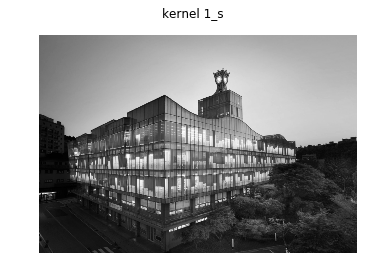

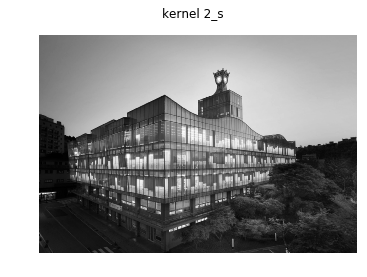

In [73]:
im_s_1 = signal.convolve2d(im_gray, ker_1_s, boundary='symm', mode='same') 
im_s_2 = signal.convolve2d(im_gray, ker_2_s, boundary='symm', mode='same') 
p1=plt.figure(1)
p1.suptitle('kernel 1_s')
plt.imshow(im_s_1,cmap = 'gray')
plt.axis('off') # Gausian blur example
p1=plt.figure(2)
p1.suptitle('kernel 2_s')
plt.imshow(im_s_2,cmap = 'gray')
plt.axis('off')
plt.show()# box blur example

images are too small to demonstrate smothing work is well done. but It does well~!

# define my own kernels 

* kerel 1 : zigzag up down 


$$
\frac{1}{169}
\begin{bmatrix}
1 & 2 & 6 & 7 & 11 \\
3 & 5 & 8 & 12 & 10\\
4 & 9 & 13 & 9 & 4\\
10 & 12 & 8 & 5 & 3\\
11 & 7 & 6 & 2 & 1
\end{bmatrix}
$$

* kernel 2 

$$
\begin{bmatrix}
1 & -1& 0 & -1 & 1 \\
-1 & 3 & -3 & 3 & -1\\
0 &  -3&  5 & -3 & 0\\
-1 & 3 & -3 & 3 & -1\\
1 & -1 & 0 & -1 & 1
\end{bmatrix}
$$


In [75]:
mykernel1 =  np.asfarray([[1,2,6,7,11],[3,5,8,12,10],[4,9,13,9,4],[10,12,8,5,3],[11,7,6,2,1]])
mykernel1 /= 169 # all summation of elements are 169

mykernel2 = np.asfarray([[1,-1,0,1,1],[-1,3,-3,3,-1],[0,-3,5,-3,0],[-1,3,-3,3,-1],[1,-1,0,-1,1]])

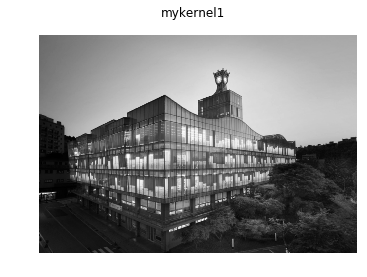

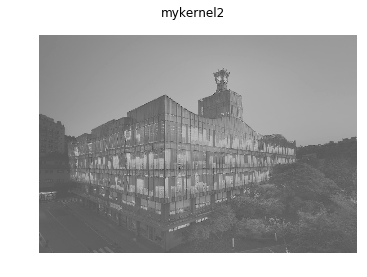

In [76]:
im_s_1 = signal.convolve2d(im_gray, mykernel1, boundary='symm', mode='same') 
im_s_2 = signal.convolve2d(im_gray, mykernel2, boundary='symm', mode='same') 
p1=plt.figure(1)# my first kernel
p1.suptitle('mykernel1')
plt.imshow(im_s_1,cmap = 'gray')
plt.axis('off')
p1=plt.figure(2)# my second kernel
p1.suptitle('mykernel2')
plt.imshow(im_s_2,cmap = 'gray')
plt.axis('off')
plt.show()

=_=